#### THIS PROJECT AIM TO ANALYSE AND FORECAST WALMAT WEEKLY SALES DATA ACROSS 45 STORES

Hypothesis Generation
1. Some specific dates should affect sales like:

        * Holidays --- increase in sales (Customers visit stores the most during holidays)
        * December will experience increase in sales (festive period)  
2. Increase in unemployment in a region can reduce sales in that region

3. Increase in temperature should increase sales (most especially products like water and drinks of any sought)

4. Increase in customer prrice index should increase sales

5. High fuel price wiill lead to less sales 


In [1]:
# importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('walmat_sales_data.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
# checking the dimension of the data
df.shape

(6435, 8)

In [4]:
# check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


The Date columns needs to be coverted to datetime

In [5]:
# converting date columns to datetime
df["Date"] = pd.to_datetime(df["Date"], format = "%d-%m-%Y")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [7]:
# cheecking for missing values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

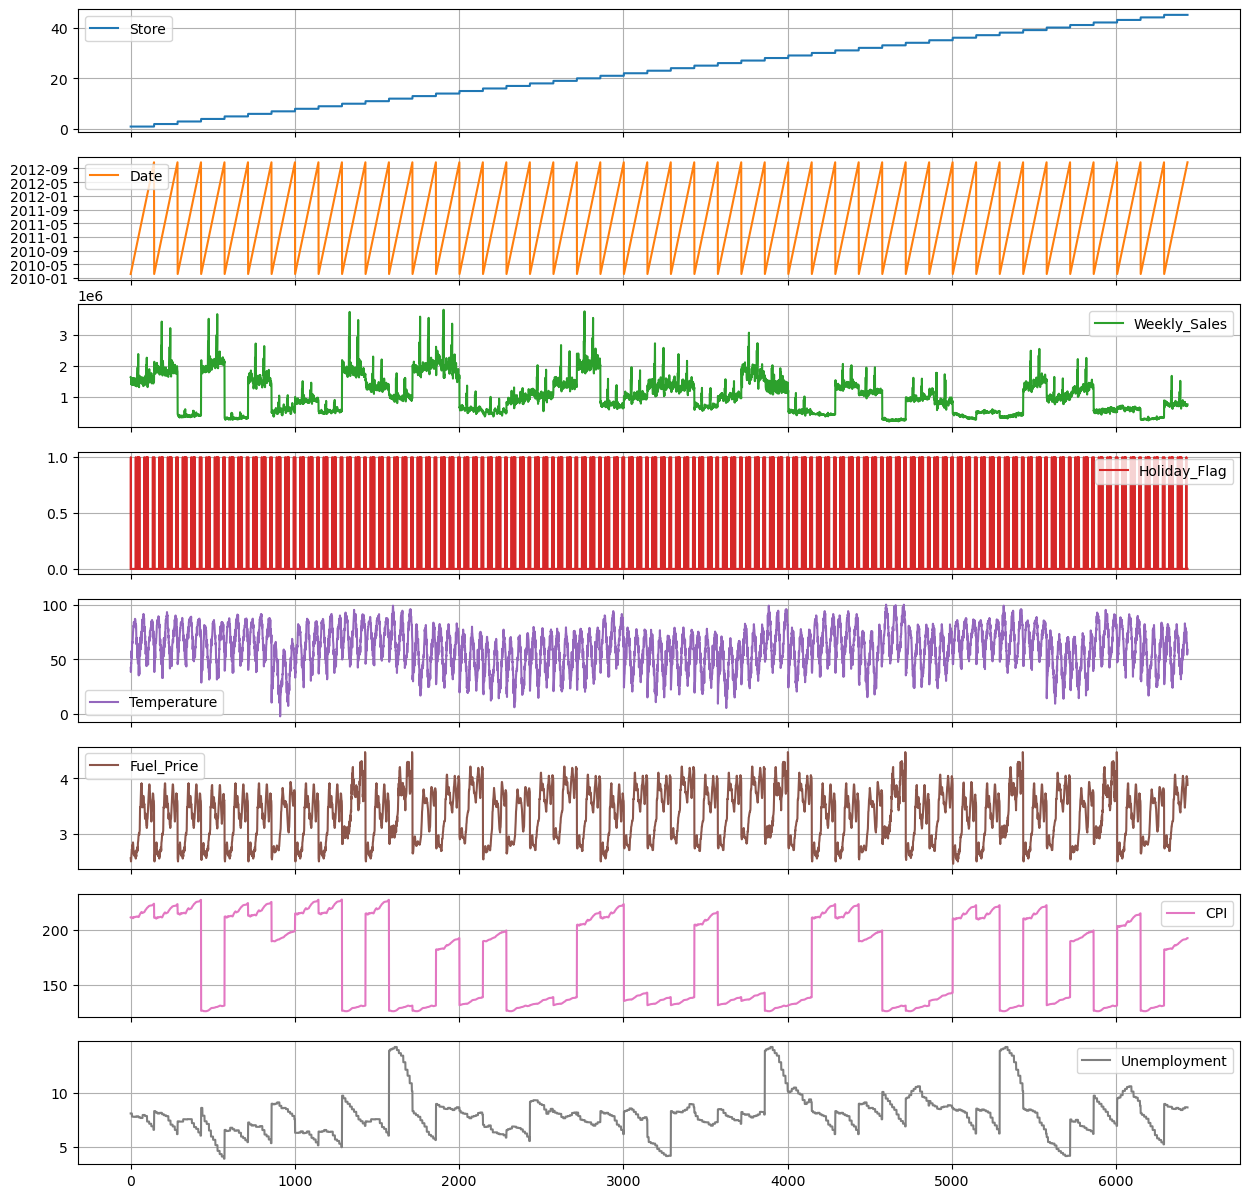

In [8]:
#viewing the dataset
df.plot(subplots = True, grid = True, figsize = (15,15))
plt.show()

There are no missing values

Feature Extraction

In [9]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Month_name"] = df["Date"].dt.month_name()

In [10]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Month_name
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,February
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,February
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,February
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,February
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,March


In [11]:
# setting the date columns as the index for easy analysis
df.set_index("Date",inplace = True)

In [12]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Month_name
Date,,,,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,February
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,February
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,February
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,February
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,March


##### Validation of the hypothesis

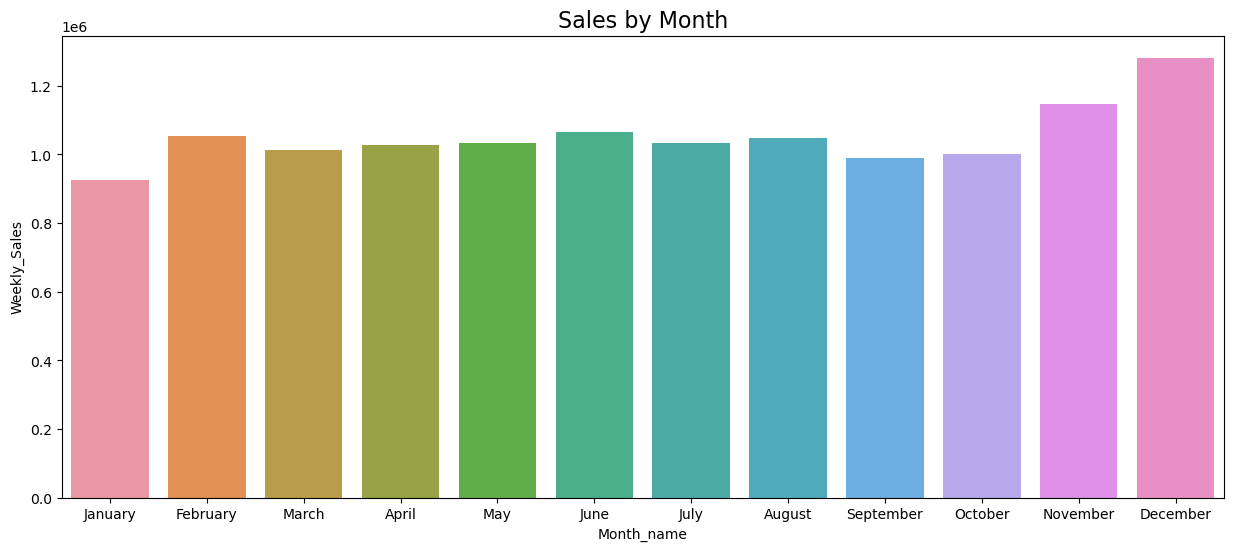

In [13]:
monthly_sales = df.groupby(["Month","Month_name"])["Weekly_Sales"].mean().reset_index()
plt.figure(figsize=(15,6))
sns.barplot(data=monthly_sales, x = "Month_name",y = "Weekly_Sales")
plt.title("Sales by Month",size = 16)
plt.show()

November and december exprienced the peak sales a across the 45 Stores this is due to the festive period it is
the festive perioid in december and also reduce spending in january after spending people must have spent much in december
This validates our hypotthesis

Let's look at the weekly sales

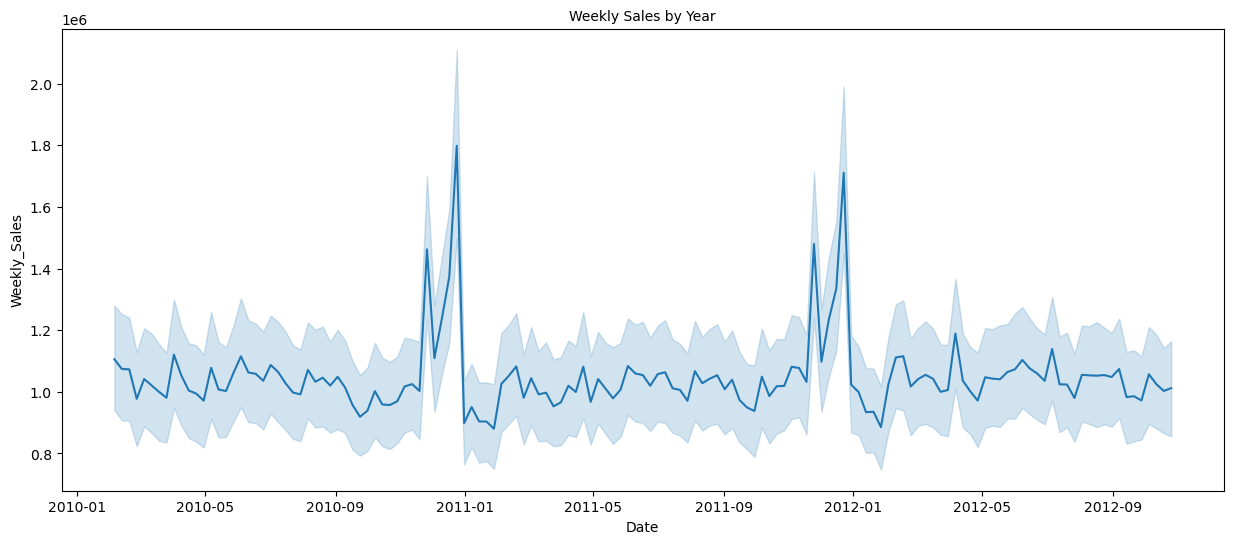

In [14]:
plt.figure(figsize = [15,6])
sns.lineplot(data = df, x = "Date", y = "Weekly_Sales")
plt.title("Weekly Sales by Year", size = 10)
plt.show()

There are peaks at the ending of each year to show more sales are recorded at that time due to the festive period which 
validates our hypothesis

Let us look at how holidays affects the sales but first of all, let us find out how many times holidays occur

<Axes: xlabel='Holiday_Flag'>

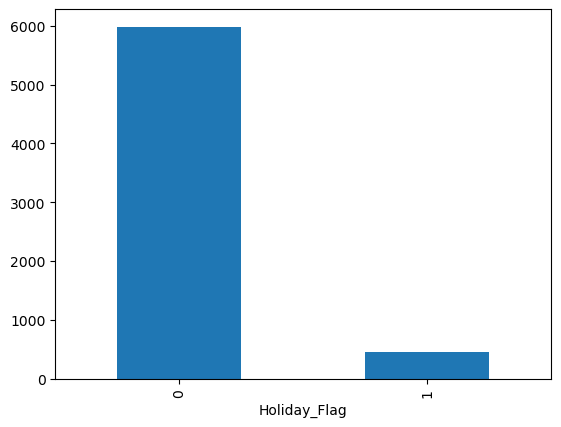

In [15]:
df["Holiday_Flag"].value_counts().plot(kind = "bar")

Obviously holiday occured for less than 500 times during this period, so now we'll check the sales during holiday and 
during working days

In [16]:
holiday_df = df[df["Holiday_Flag"] == 1]
working_df = df[df["Holiday_Flag"] == 0]

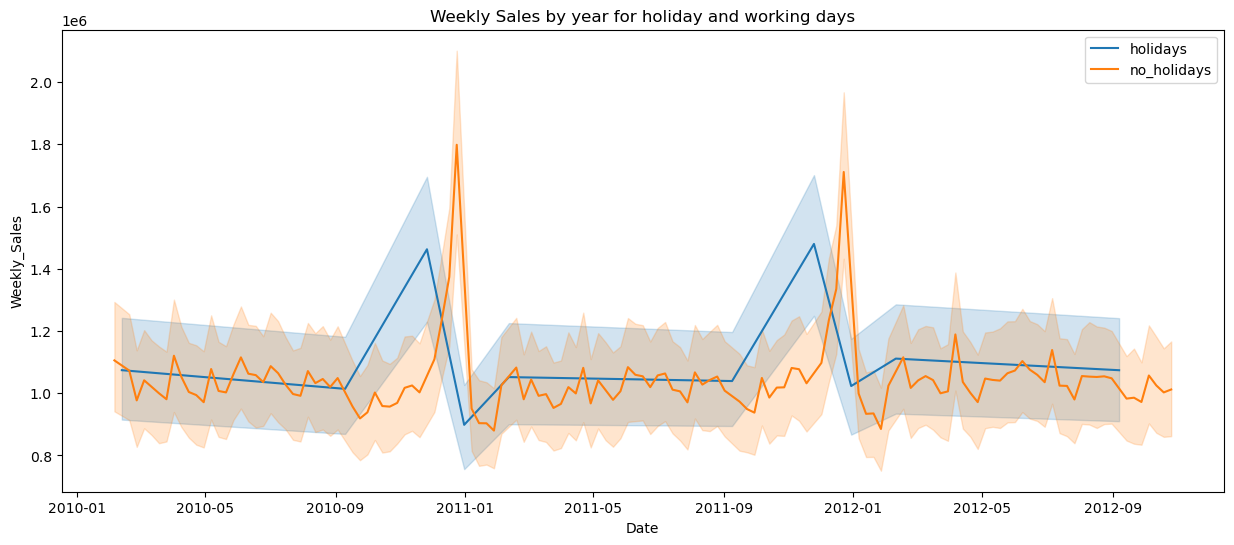

In [17]:
plt.figure(figsize = [15,6])
sns.lineplot(data = holiday_df, x = "Date", y = "Weekly_Sales",label = "holidays")
sns.lineplot(data = working_df, x = "Date", y = "Weekly_Sales",label = "no_holidays")
plt.title("Weekly Sales by year for holiday and working days", size = 12)
plt.legend()
plt.show()

Customers buys more during the working days than on holidays

Now lets check how seasons affect our data, we'll start by creating a saeson column

In [18]:
def get_season(month):
    if month in ["December","January","February"]:
        return "Winter"
    elif month in ["March", "April","May"]:
        return "Spring"
    elif month in ["June","July","August"]:
        return "Summer"
    else:
        return "Fall"
df["season"] = df["Month_name"].apply(get_season)

In [19]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Month_name,season
Date,,,,,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,February,Winter
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,February,Winter
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,February,Winter
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,February,Winter
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,March,Spring


Text(0.5, 1.0, 'Weekly Sales by season')

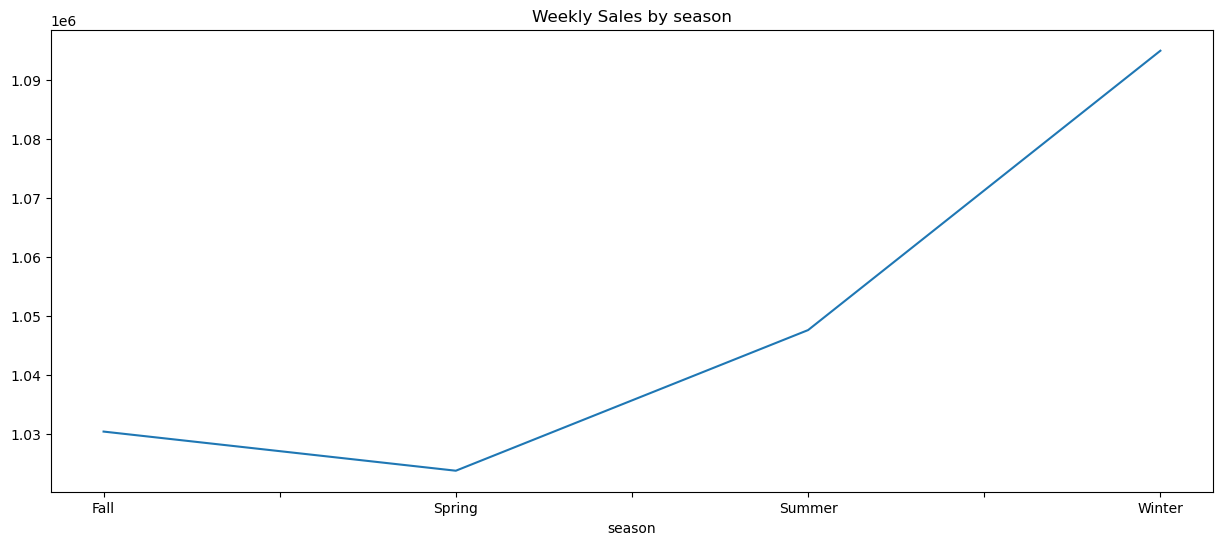

In [20]:
plt.figure(figsize = (15,6))
df.groupby("season")["Weekly_Sales"].mean().plot()
plt.title("Weekly Sales by season")

Spring recorded the least mean weekly sales and winter had the most sales by week

Now let's check how temperature affects sales, first we convert it to celsius 

In [21]:
df["Temperature"] = (df["Temperature"] - 32)*5/9
df["Temperature"].describe()

count    6435.000000
mean       15.924324
std        10.247185
min       -18.922222
25%         8.588889
50%        17.038889
75%        23.855556
max        37.855556
Name: Temperature, dtype: float64

In [22]:
def numerical_plot2(data, month_data, x_data,y_data,new_column):
    plt.figure(figsize=(15,6))
    monthly_sales = df.groupby(month_data)[[x_data,y_data]].mean().reset_index()
    monthly_sales = monthly_sales.rename(columns = {y_data: new_column})
    sns.lineplot(data = monthly_sales, x = x_data, y = new_column)
    plt.title(x_data+" "+"by"+" "+new_column)
    plt.show()

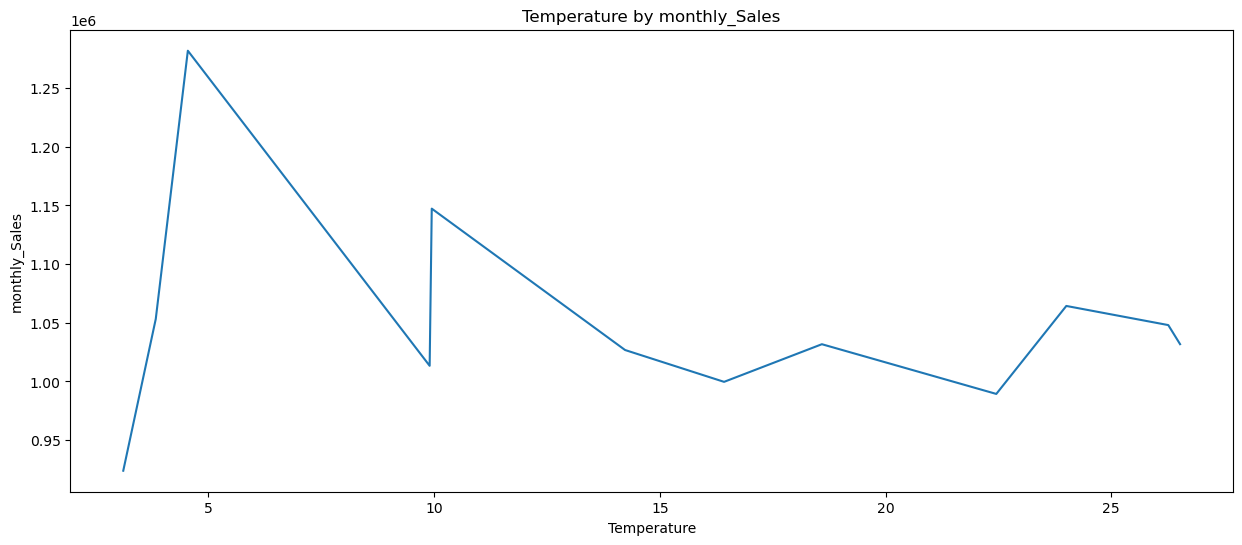

In [23]:
numerical_plot2(df, "Month_name","Temperature","Weekly_Sales","monthly_Sales")

The highest sales was recorded when the temperature was low

let us check how Fuel_Price affects Weekly sales

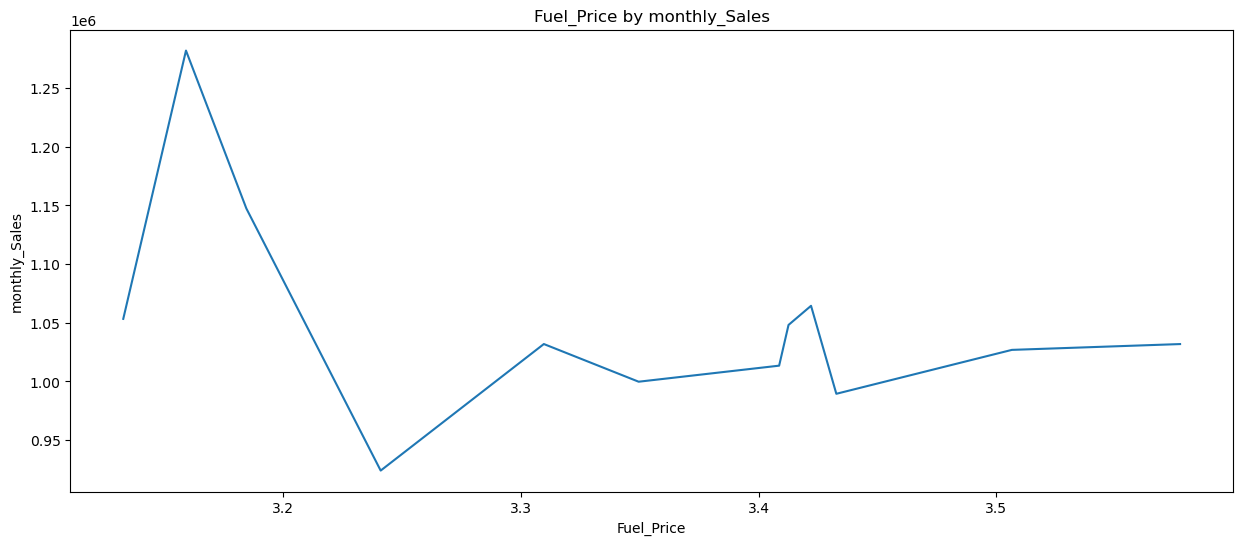

In [24]:
numerical_plot2(df, "Month_name","Fuel_Price","Weekly_Sales","monthly_Sales")

High Sales was recorded during the month when the fuel price is low --- This validates our hypothesis

Let us now check how CPI affect Sales on the weekly anad monthly bases

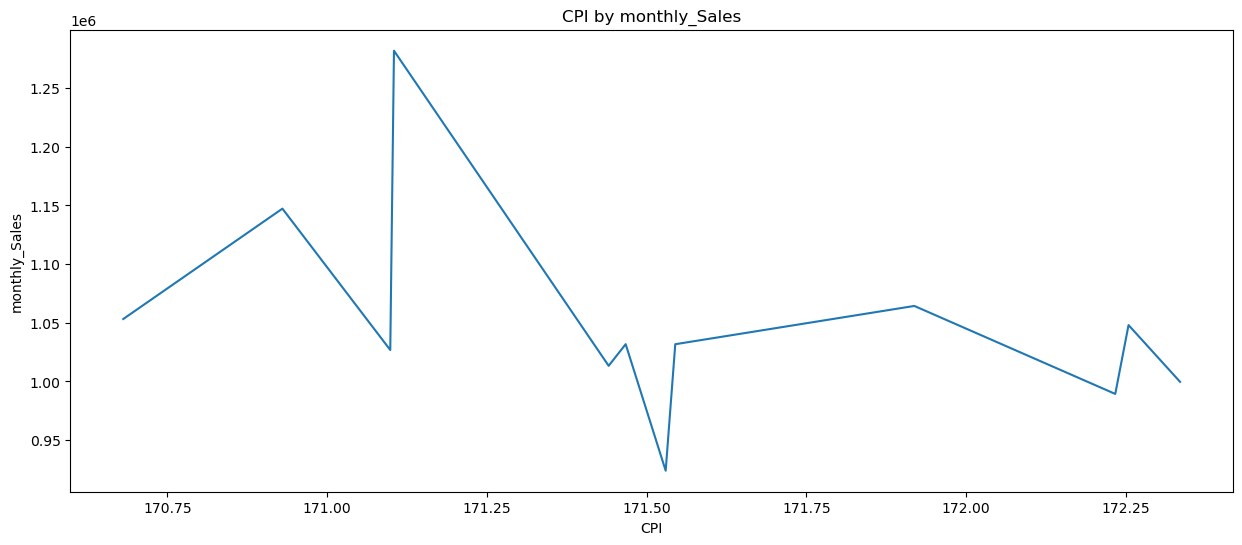

In [25]:
numerical_plot2(df, "Month_name","CPI","Weekly_Sales","monthly_Sales")

Finally lets check how unemployment affect weekly sales

Text(0.5, 1.0, 'Unemployment by weekly Sales')

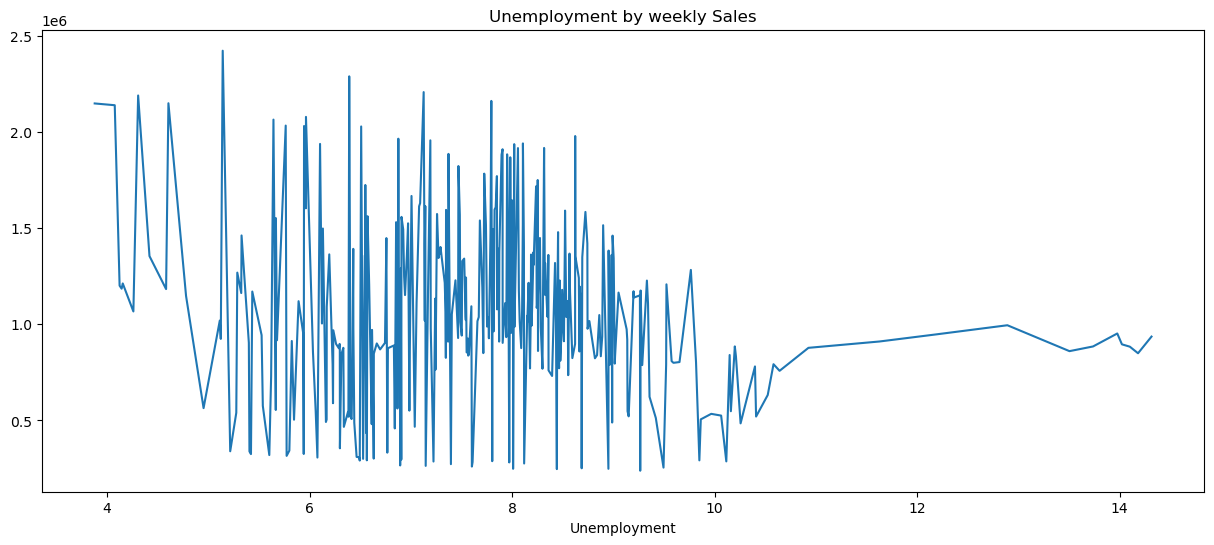

In [26]:
plt.figure(figsize = (15,6))
df.groupby("Unemployment")["Weekly_Sales"].mean().plot()
plt.title("Unemployment by weekly Sales")

High Unemployment rate leads to low sales --- This validates our hypothesis

### Forecasting Using LSTM

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1500x600 with 0 Axes>

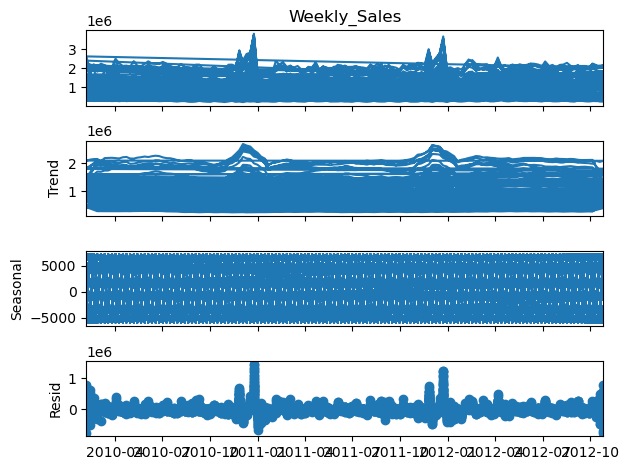

In [28]:
results = seasonal_decompose(df["Weekly_Sales"], period = 7)
plt.figure(figsize=(15,6))
results.plot();

In [29]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Month_name,season
Date,,,,,,,,,,,
2010-02-05,1,1643690.90,0,5.727778,2.572,211.096358,8.106,2010,2,February,Winter
2010-02-12,1,1641957.44,1,3.616667,2.548,211.242170,8.106,2010,2,February,Winter
2010-02-19,1,1611968.17,0,4.405556,2.514,211.289143,8.106,2010,2,February,Winter
2010-02-26,1,1409727.59,0,8.127778,2.561,211.319643,8.106,2010,2,February,Winter
2010-03-05,1,1554806.68,0,8.055556,2.625,211.350143,8.106,2010,3,March,Spring


In [30]:
# selecting the required column for forecasting
df_input = df[["Weekly_Sales","Temperature","Fuel_Price","Unemployment"]]

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [32]:
data_scaled = scaler.fit_transform(df_input)

In [33]:
features = data_scaled
target = data_scaled[:,0]

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, LeakyReLU, Dropout
from math import sqrt

In [35]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42, shuffle = False)

In [36]:
x_train.shape, x_test.shape

((5148, 4), (1287, 4))

In [37]:
win_length = 200
batch_size = 32
num_features = 4
train_generator = TimeseriesGenerator(x_train, y_train, length = win_length, sampling_rate = 1, batch_size = batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length = win_length, sampling_rate = 1, batch_size = batch_size)

In [38]:
model = Sequential()
model.add(LSTM(128, input_shape = (win_length, num_features), return_sequences = True))
model.add(LeakyReLU(alpha = 0.5))
model.add(LSTM(128, return_sequences = True))
model.add(LeakyReLU(alpha = 0.5))
model.add(Dropout(0.3))
model.add(LSTM(64, return_sequences = False))
model.add(Dropout(0.3)) # to avoid overfitting
model.add(Dense(1))

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200, 128)          68096     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 200, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 200, 128)          131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 200, 128)          0         
                                                                 
 dropout (Dropout)           (None, 200, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [40]:
# to stop training when the model stop learning
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 2, mode = "min")

model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = [tf.metrics.MeanAbsoluteError()])

In [41]:
history = model.fit_generator(train_generator, epochs = 50, validation_data = test_generator, shuffle = False,
                             callbacks = [early_stopping])

Epoch 1/50

155/155 [==============================] - 53s 282ms/step - loss: 0.0242 - mean_absolute_error: 0.1163 - val_loss: 0.0056 - val_mean_absolute_error: 0.0538
Epoch 2/50
155/155 [==============================] - 42s 268ms/step - loss: 0.0092 - mean_absolute_error: 0.0678 - val_loss: 0.0036 - val_mean_absolute_error: 0.0435
Epoch 3/50
155/155 [==============================] - 41s 266ms/step - loss: 0.0073 - mean_absolute_error: 0.0599 - val_loss: 0.0026 - val_mean_absolute_error: 0.0351
Epoch 4/50
155/155 [==============================] - 41s 267ms/step - loss: 0.0062 - mean_absolute_error: 0.0532 - val_loss: 0.0029 - val_mean_absolute_error: 0.0395
Epoch 5/50
155/155 [==============================] - 42s 269ms/step - loss: 0.0063 - mean_absolute_error: 0.0549 - val_loss: 0.0024 - val_mean_absolute_error: 0.0336
Epoch 6/50
155/155 [==============================] - 42s 271ms/step - loss: 0.0054 - mean_absolute_error: 0.0498 - val_loss: 0.0023 - val_mean_absolute_error: 0.03

In [52]:
predictions = model.predict_generator(test_generator)

In [53]:
predictions.shape

(1087, 1)

In [54]:
# ignoring the first 200 datapoints because predictions were made on the remaining due to the window length
new_x_test = x_test[:,1:][win_length:]

In [55]:
df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(new_x_test)], axis = 1)

In [56]:
# reconvert back to normal form
rev_trans = scaler.inverse_transform(df_pred)

In [57]:
# combining the prediction with only the required data point from the original dataset
df_final = df_input[predictions.shape[0]*-1:]
df_final.count()

Weekly_Sales    1087
Temperature     1087
Fuel_Price      1087
Unemployment    1087
dtype: int64

In [58]:
# creating a new column for the predicted values
df_final["Sales_pred"] = rev_trans[:,0] # picking only the weekly Sales

In [59]:
df_final

,Weekly_Sales,Temperature,Fuel_Price,Unemployment,Sales_pred
Date,,,,,
2011-03-11,357897.18,14.305556,3.818,14.021,623967.363272
2011-03-18,349459.95,17.894444,3.692,14.021,621566.146962
2011-03-25,351541.62,12.444444,3.909,14.021,611707.765035
2011-04-01,382098.13,17.572222,3.772,13.736,601578.067282
2011-04-08,392152.30,18.038889,4.003,13.736,594228.664406
...,...,...,...,...,...
2012-09-28,713173.95,18.266667,3.997,8.684,790411.112733
2012-10-05,733455.07,18.272222,3.985,8.667,791699.963732
2012-10-12,734464.36,12.483333,4.000,8.667,792423.329204


<Axes: xlabel='Date'>

<Figure size 1500x600 with 0 Axes>

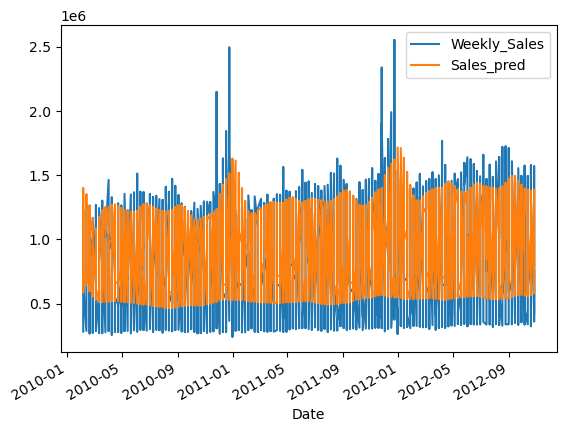

In [60]:
plt.figure(figsize = (15,6))
df_final[["Weekly_Sales", "Sales_pred"]].plot()

In [61]:
# Evaluating the model
rmse = sqrt(mean_squared_error(df_final["Weekly_Sales"],df_final["Sales_pred"]))
rmse

171327.51601377764

### CONCLUSION
Our model did not capture the peak values and trends in the data. most likely we nee to detrend the data or build features that
can complement the trend in the data